# Outliers vs the NORMAL

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML

plt.rcdefaults()
# plt.xkcd(scale=1, length=300, randomness=5)

## A. A NORMAL Spender Model

### Mean and deviation

Suppose, on average you purchase $\mu=20$ dollars with deviation $\sigma=10$: 

In [2]:
mu, sigma = 20, 10

Here we set the mean $\mu$ and standard deviation $\sigma$ to 20 and 10 respectively. 

### Normal Distribution (Model)

Let's simulate 100 purchases you *may* make following a **normal** (Gaussian) distribution: 

In [3]:
purchases = np.random.normal(mu, sigma, 100)

We use the NumPy's normal distribution model to generate the 100 purchase amounts, just like what you could have done. 

Now we show the distribution of your data using a histogram: 

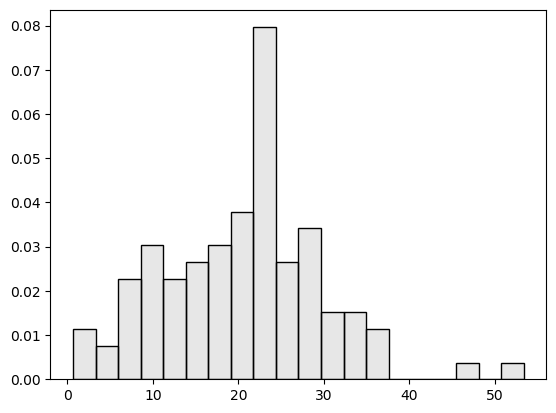

In [4]:
count, bins, ignored = plt.hist(purchases, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")

### Normal Density Distribution 

Compare to the normal distribution density function: 

\begin{eqnarray}
f(x) & = & \frac{1}{\sigma \sqrt{2\pi}} e^{- \left( {x - \mu } \right)^2 / 2\sigma^2}
\end{eqnarray}

Now that we assume the data follow a normal distribution -- and it does -- the data should follow the normal distribution curve. So let's compare the histogram to the NORMAL model that generates the data. 

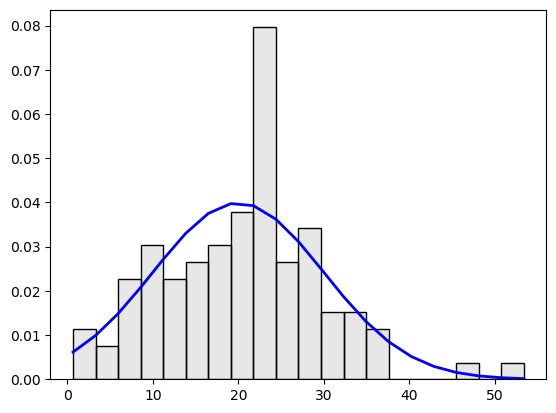

In [5]:
count, bins, ignored = plt.hist(purchases, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                linewidth=2, color='b')
plt.show()

The blue curve depicts the MODEL, i.e. the normal distribution where the data come from. But it is easy to tell that the actual data, shown as the histogram, do not form the exact bell shape of the model. 

The actual spending, for example, may tend to have more purchases with a greater amount, than what the model suggests. This is because the model is probabilistic and comes with a degree of randomness. That leads to the variance in the data and unpredictability of individual data instances. 

And this is the **noise**, which may appear to be outliers but, in fact, comes from the one same model that generates all data here. 

In terms of the distribution here, it is very unlikely that you will spend more than 50 dollar on an order:

In [6]:
from scipy.stats import norm
normal_spender = norm(mu, sigma)
prob = 1-normal_spender.cdf(50)
print("How likely is an order of over 50 dollars? {:.2f}".format(prob))

How likely is an order of over 50 dollars? 0.00


## B. Outliers in Belgium International Phone Calls

The number of international phone calls (millions) from Belgium during 1950 - 1973: 

### Data

In [7]:
phones = pd.read_csv("data/phones.csv")
phones[['year','calls']].head(10)

year  calls
0    50    4.4
1    51    4.7
2    52    4.7
3    53    5.9
4    54    6.6
5    55    7.3
6    56    8.1
7    57    8.8
8    58   10.6
9    59   12.0

### Statistics

In [8]:
phones[['year','calls']].describe()

year       calls
count  24.000000   24.000000
mean   61.500000   49.991667
std     7.071068   65.532109
min    50.000000    4.400000
25%    55.750000    7.900000
50%    61.500000   15.500000
75%    67.250000   62.000000
max    73.000000  212.000000

### Distribution

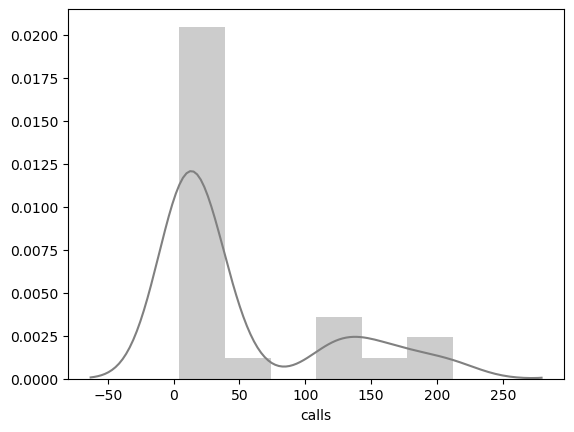

In [9]:
sns.distplot(phones["calls"], color="gray")

### Potential Correlation

In [10]:
phones[['year','calls']].corr(method="pearson")

year     calls
year   1.000000  0.543987
calls  0.543987  1.000000

### Linear Regression

LSM, least Squares from the mean: 
+ Least **mean** squares to be minimized
+ Tries to fit all values

If we conduct a linear regression based on the classic method of least squares, which is to minimize the sum of squared errors from the **mean**, we obtain: 

In [11]:
from sklearn.linear_model import LinearRegression

x = phones['year'].values.reshape(-1,1)
y = phones['calls'].values.reshape(-1,1)

def lsm_mean():
    lsm = LinearRegression()
    lsm.fit(x, y)
    # print(lsm.intercept_, lsm.coef_)
    global yp 
    yp = lsm.predict(x)

    # plt.scatter(x, y,  color='gray')
    plt.plot(x, yp, color='red', linewidth=2)
    plt.xlabel("Year")
    plt.ylabel("# Calls (tens of millions)")
    plt.show()

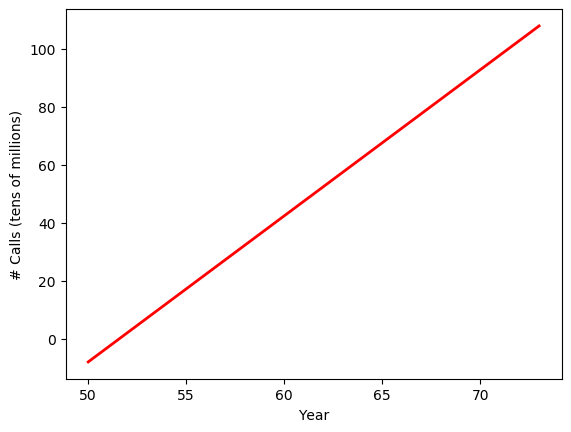

In [12]:
lsm_mean()

The linear regression model shows the positive relation between year and the number of phone calls. Over time, there is an increasing number of calls from Belgium, which makes sense. 

Again, the regression model here is to minimize the sum of least squared errors, from the mean. That is, the model try to fit the regression line along the mean or average over the years. 

#### Robust Linear Regression

LAD, least absolute deviation from the median: 
+ A quantile regression, with q=0.5 (median)
+ Robust regression models
+ **Median**, instead of mean, deviation
+ **Least affected by extreme values**, e.g. outliers

An alternative regression technique is refered to as the Quantile Regression, which is part of a family of techniques for robust regression. We know that the quantitle at 0.5 or 50% is the middle of all values and is the median. So a quantile regression with q=0.5 is "median regression," based on least absolute deviation. 

In this case, when fitting the model, values and errors in the middle have a greater impact on the regression model. Extreme values, which are at the two ends of a distribution, will hardly have an impact on the median error estimate. So outliers will be less likely to impact the results. 

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def lad_median():
    # rlm = sm.RLM(x, y, M=sm.robust.norms.HuberT())
    rlm = smf.quantreg('calls ~ year', phones)
    rlm_res = rlm.fit(q=0.5)
    # print(rlm_res.summary())
    global yp2
    yp2 = rlm_res.params[0] + x * rlm_res.params[1]

    # plt.scatter(x, y,  color='gray')
    plt.xlabel("Year")
    plt.ylabel("# Calls (millions)")
    plt.plot(x, yp, color='red', linewidth=2, label="Least Square (Mean)")
    plt.plot(x, yp2, color='blue', linewidth=2, label="Least Deviation (Median)")
    plt.legend()
    plt.show()

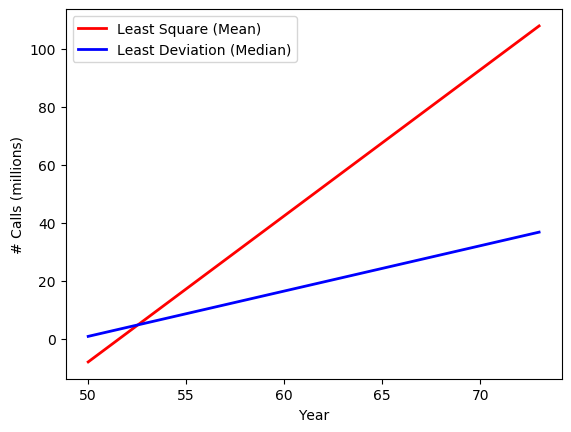

In [14]:
lad_median()

Now after we perform the "median regression", we can compare its regression line (the blue one) to the regression based on least mean squares (the red line). The two lines are very different. In particular , the least mean square model has a much steep regression line. What happened? 

In [15]:
def show_data():
    plt.scatter(x, y,  color='gray', label="Data")
    plt.xlabel("Year")
    plt.ylabel("# Calls (millions)")
    plt.plot(x, yp, color='red', linewidth=2, label="Least Square (Mean)")
    plt.plot(x, yp2, color='blue', linewidth=2, label="Least Deviation (Median)")
    plt.legend()
    plt.show()

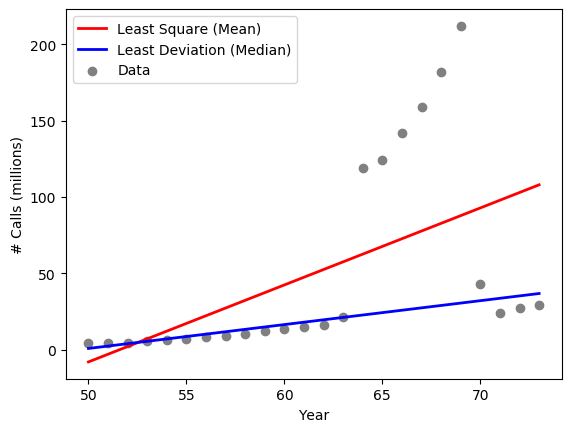

In [16]:
show_data()

Now if we plot the actual data, the figure gives us some clues about what make the difference. 

As shown in the data, there are anomalies in the data, specifically during years 1964 - 1969, where the numbers of calls appear to be unsually greater. 

The model based on least mean squares, the red line, is fitting the regression line in terms of mean squared errors. The mean, as we know, is affected by all values. So essentially, the least mean square model is trying to "please" every single data points and the group of outliers will have a major impact on the final regression line, which goes in between the normal data points and outliers. 

The "median regression" (so to speak), the blue line, is immune to the outliers because it relies on the median deviation. As you can see, it fits the normal data points very well. 

But what are the outliers? What do they represent? Where do they come from? 

In [17]:
def show_data_groups():
    phones1 = phones[phones["calls"]<100]
    plt.scatter(phones1["year"], phones1["calls"],  color='black', label="Number of Calls")
    phones2 = phones[phones["calls"]>=100]
    plt.scatter(phones2["year"], phones2["calls"],  color='red', label="Calls in Minutes (mistaken)")
    plt.xlabel("Year")
    plt.ylabel("# Calls (millions)")
    plt.legend()
    plt.show()

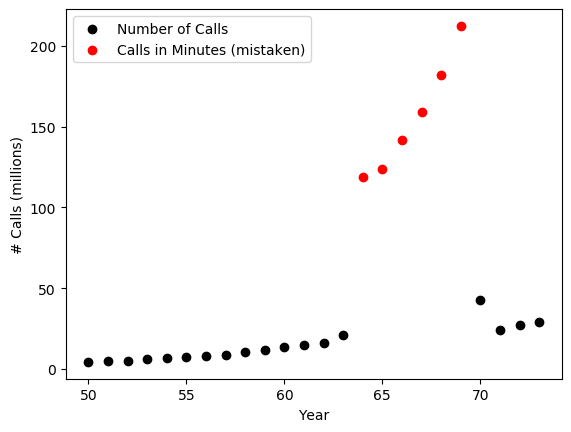

In [18]:
show_data_groups()

In our definition of outliers, we declare that they must have come from a process or model different from the one that generates the normal data. So if the normal data points come from the number of phone calls Belgium people make? What the outliers? 

It turns out that the outliers are still about phone calls from people in Belgium. However, they were mistakenly recorded as the number of minutes, instead of counts of individual calls. So while the black normal data points come from a "counting" process, and the red outliers come from the time log. They are indeed two separate models. 

## C. Parametric Detection: What is a NORMAL temperature? 

As we discussed, outliers come from a different process or model that generates normal data. These are generative models or stochastic (random) processes hidden behind the data. The idea here is that if we can find out the model that produce normal data, we will then be able to estimate the likelihood or probability of potential outliers. 

1. **Parametric** methods: data are generated by a distribution ```model``` with parameters. 
2. **Nonparametric** methods: do not assume a model but try to determine it ```from data```. 

Example, temperature data in &deg;C:

In [19]:
 x = [24.0, 28.9, 28.9, 29.0, 29.1, 29.1, 29.2, 29.2, 29.3, 29.4]

<div style="width:300px; float:right; position: relative;text-align: center;">
    <img src="../figures/outliers/summer.jpg" style="width:100%;" alt="Summer">
    <div style="position:absolute; top:50%; left:50%; transform:translate(-50%, -50%); font-size:48pt;">
        <font style="color:blue; background-color: white;">0&deg;C</font>
    </div>
</div>

Given the above sample data and the NORMAL assumption, how likely are the following? 
1. A temperature **below 0 &deg;C**? 
2. A temperature **above 30 &deg;C**?

Are the values normal or outliers? 

### 1. Estimate Mean and Deviation from Sample

Given normal distribution, two parameters to be estimated: 
1. Mean: $\hat{\mu} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
2. Variance: $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [20]:
import math
import numpy as np
mu = np.mean(x)
std = np.std(x)

In [21]:
print("Mean = {:.2f}".format(mu))
print("Deviation = {:.2f}".format(std))

Mean = 28.61
Deviation = 1.54


### 2. Build the Normal Model with Estimated Parameters

In [22]:
from scipy.stats import norm
model = norm(mu, std)

### 3. Compute the Likelihood of Temperature Ranges

In [23]:
t1,t2 = 0, 30
print("How likely is a temperature below 0 C?", model.cdf(t1))
print("How likely is a temperature above 30 C?", 1-model.cdf(t2))

How likely is a temperature below 0 C? 6.365081116116361e-77
How likely is a temperature above 30 C? 0.1840396103031391


Given the observed temperature data, $t_1=0$ is extremely unlikley to be generated by the normal distribution model here and is most likely an outlier. 

## D. NORMAL Age in Context

Some data do not appear to be outlier, until they are viewed in the context. Let's look at the normal ```age``` of a working person in the context of demographical groups. 

### 1. Census Income Data

The data are based on the 1994 Census of the U.S. 

https://archive.ics.uci.edu/ml/datasets/Adult

The dataset comes with attributes including age, education, sex, and income levels. 

In [24]:
people = pd.read_csv("data/adult.data", header=None, skipinitialspace=True)
people.columns = ["age", "workclass", "fnlwgt", "education", 
                  "education_num", "marital_status", "occupation", 
                  "relationship", "race", "sex", "capital_gain", 
                  "capital_loss", "hours_per_week", "native_country",
                  "income"
                 ]
people.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [25]:
people.shape

(32561, 15)

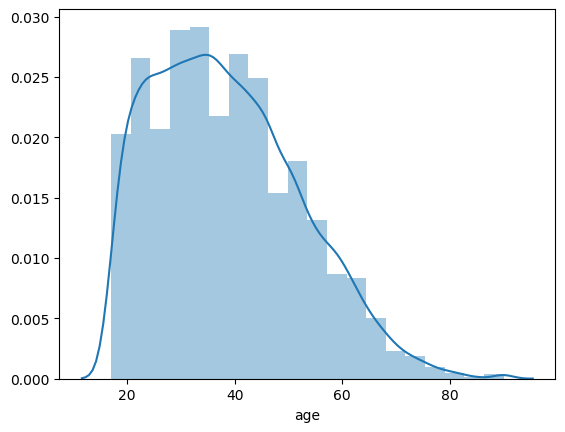

In [26]:
sns.distplot(people['age'], bins=20)

What is the chance of a working 18-year old or younger? Assume a normal distribution. 

In [27]:
mu, std = norm.fit(people['age'])
normal_age = norm(mu, std)
p = normal_age.cdf(18)
print("{:.2f}".format(p))

0.07


The probability is about $7\%$. It is less common but not necessarily abnormal. 

### 2. Working Age of Male vs. Female

Age distributions for **male vs. female**: 

In [28]:
counts = people.groupby('sex').size()
print(counts)

sex
Female    10771
Male      21790
dtype: int64


In [29]:
male = people[(people['sex'] == 'Male')]
female = people[(people['sex'] == 'Female')]
print(male.shape, female.shape)

(21790, 15) (10771, 15)


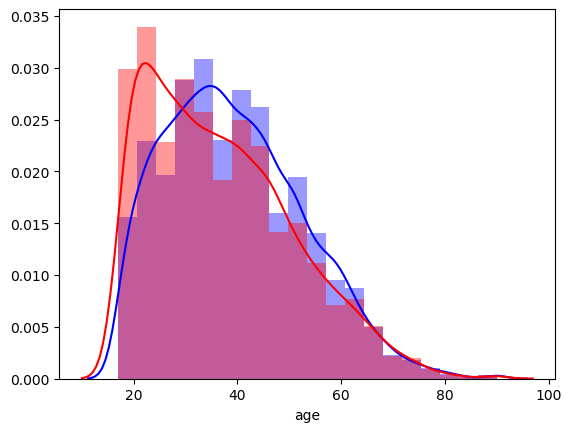

In [30]:
# male_age = male['age']
# female_age = female['age']
# male_age.hist(histtype='stepfilled', color='blue', alpha=0.5, bins=20)
# female_age.hist(histtype='stepfilled', color="red", alpha=0.5, bins=20)
sns.distplot(male['age'], color='blue', bins=20)
sns.distplot(female['age'], color='red', bins=20)

In [31]:
# female_age.hist(density=True, histtype='stepfilled', color="red", alpha=0.5, bins=20)
# male_age.hist(density=True, histtype='stepfilled', color=sns.desaturate("blue",.75), alpha=0.5, bins=20)

### 3. NORMAL Age with a Graduate Degree

The distributions of income data in the ```education``` groups. 

In [32]:
counts = people.groupby('education').size()
print(counts)

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64


Consider people with a Masters or Doctorate degree: 

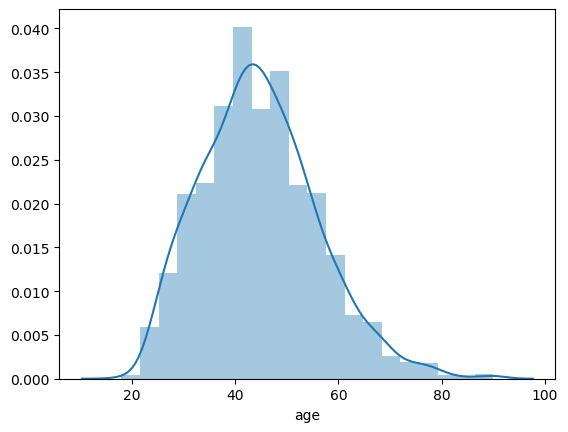

In [33]:
graduate = people[(people['education'] == 'Masters') | (people['education'] == 'Doctorate')]
sns.distplot(graduate['age'], bins=20)

Again, we can estimate the normal distribution based on the sample with a graduate degree: 

In [34]:
mu, std = norm.fit(graduate['age'])
print(mu, std)
normal_graduate_age = norm(mu, std)

44.7560861423221 11.297888522031448


How likely is ```age=18``` or younger in the population with a graduate degree? 

In [35]:
p = normal_graduate_age.cdf(18)
print("{:.3f}".format(p))

0.009


The chance is $<1\%$. It is quite abnormal and suggests likely outliers in the context of having a ```graduate``` degree. 

## References

+ Han, Jiawei and Kamber, Micheline (2011). Data Mining: Concepts and Techniques (3rd Edition). Morgan Kaufmann Publishers, San Francisco.
+ Ian H. Witten, Eibe Frank, Mark A. Hall, Christopher J. Pal (2017). Data Mining: Practical Machine Learning Tools and Techniques (Morgan Kaufmann Series in Data Management Systems) 4th Edition. 
+ Laura Igual and Santi Seguí (2017). Introduction to Data Science: A Python Approach to Concepts, Techniques, and Applications. Springer. 